In [ ]:
!pip install mdptoolbox-hiive gym

In [1]:
import numpy 
import time 
import gym
import matplotlib.pyplot as plt
import numpy.random as rnd
import numpy as np
import pandas as pd


In [2]:
# borrowed from https://github.com/okazkayasi/CS7641/blob/master/mkazkayasi3_Assignment4/VI_PI_FrozenLake.ipynb
# Just for plotting as this was very neat

from gym.envs.toy_text.frozen_lake import generate_random_map, FrozenLakeEnv
np.random.seed(44)
sixteen = generate_random_map(16)
np.random.seed(44)
tvelve = generate_random_map(12)
MAPS = {
    "4x4": [
        "SFFF",
        "FHFH",
        "FFFH",
        "HFFG"
    ],
    "8x8": [
        "SFFFFFFF",
        "FFFFFFFF",
        "FFFHFFFF",
        "FFFFFHFF",
        "FFFHFFFF",
        "FHHFFFHF",
        "FHFFHFHF",
        "FFFHFFFG"
    ],
    "12x12": tvelve,
    "16x16": sixteen
}

def map_discretize(the_map):
    size = len(the_map)
    dis_map = np.zeros((size,size))
    for i, row in enumerate(the_map):
        for j, loc in enumerate(row):
            if loc == "S":
                dis_map[i, j] = 0
            elif loc == "F":
                dis_map[i, j] = 0
            elif loc == "H":
                dis_map[i, j] = -1
            elif loc == "G":
                dis_map[i, j] = 1
    return dis_map


def policy_numpy(policy):
    size = int(np.sqrt(len(policy)))
    pol = np.asarray(policy)
    pol = pol.reshape((size, size))
    return pol


def see_policy(map_size, policy):
    map_name = str(map_size)+"x"+str(map_size)
    data = map_discretize(MAPS[map_name])
    np_pol = policy_numpy(policy)
    plt.imshow(data, interpolation="nearest")

    for i in range(np_pol[0].size):
        for j in range(np_pol[0].size):
            arrow = '\u2190'
            if np_pol[i, j] == 1:
                arrow = '\u2193'
            elif np_pol[i, j] == 2:
                arrow = '\u2192'
            elif np_pol[i, j] == 3:
                arrow = '\u2191'
            text = plt.text(j, i, arrow,
                           ha="center", va="center", color="w")
    plt.show()

In [3]:
#Adapted from https://github.com/danpisq/Value-and-Policy-iteration-OpenAI-FrozenLake/blob/master/value_iteration.py

def print_policy(V, width=8, height=8):
    table = {0: "←", 1: "↓", 2: "→", 3: "↑"}
    policy = numpy.resize(V, (width, height))
    
    # transform using the dictionary
    return numpy.vectorize(table.get)(policy)

In [4]:
def execute(env, policy, gamma=1.0, render=False):
  start = env.reset()
  totalReward = 0
  stepIndex = 0
  while True:
    if render:
      env.render()
    start, reward, done,_ = env.step(int(policy[start]))
    totalReward += (gamma ** stepIndex * reward)
    stepIndex += 1
    if done:
      break
  return totalReward
    
#Evaluation
def evaluatePolicy(env, policy, gamma=1.0, n=20):
  scores = [execute(env, policy, gamma, False) for _ in range(n)]
  #return numpy.mean(scores), scores, sum([x==1.0 for x in scores])
  return numpy.mean(scores)

In [5]:
#Value Iteration Algorithm
def valueIteration(env, gamma=1.0, eps=0):
  value = numpy.zeros(env.env.nS)
  max_iterations = 10000
  r_v = []

  for i in range(max_iterations):
    prev_v = numpy.copy(value)
    for s in range(env.env.nS):
      q_sa = [sum([p * (r + prev_v[s_]) for p, s_, r, _ in env.env.P[s][a]]) for a in range(env.env.nA)]
      value[s] = max(q_sa)
    r_v.append((i+1, numpy.sum(value)-numpy.sum(prev_v)))
    if (numpy.sum(numpy.fabs(prev_v - value)) <= eps):
      converged_at = i+1
      break
  return value, i+1, r_v



In [6]:
#choosing a policy given a value-function
def calculatePolicy(v, gamma=1.0):
  policy = numpy.zeros(env.env.nS)
  for s in range(env.env.nS):
    q_sa = numpy.zeros(env.action_space.n)
    for a in range(env.action_space.n):
      for next_sr in env.env.P[s][a]:
        p, s_, r, _ = next_sr
        q_sa[a] += (p * (r + gamma * v[s_]))
    policy[s] = numpy.argmax(q_sa)
  return policy
  

[(1, 0.3333333333333333), (2, 0.3333333333333334), (3, 0.29629629629629617), (4, 0.2716049382716049), (5, 0.251028806584362), (6, 0.23319615912208502), (7, 0.21810699588477367), (8, 0.20454199055022082), (9, 0.19250114311842692), (10, 0.18144253077952177), (11, 0.17132663832861983), (12, 0.16209513379660212), (13, 0.1541343880756907), (14, 0.14692024974445772), (15, 0.1408981882731557), (16, 0.13571674832096914), (17, 0.13099157231201586), (18, 0.12663375942411736), (19, 0.12256479118050301), (20, 0.11872880608312641), (21, 0.115085036579333), (22, 0.1116015346720669), (23, 0.10825578745039177), (24, 0.10503028813700421), (25, 0.10191259982801526), (26, 0.09889314937769456), (27, 0.09596498157852285), (28, 0.09312270080056706), (29, 0.09036222274800121), (30, 0.08768026544684915), (31, 0.0850741776532935), (32, 0.08254169469030526), (33, 0.08008083799076715), (34, 0.0776898004472022), (35, 0.07536689430476429), (36, 0.0731105000597223), (37, 0.07091904290444706), (38, 0.069148239226832

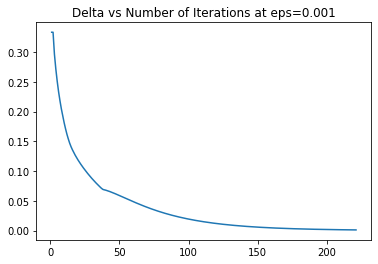

In [20]:
gamma = 0.99
env = gym.make('FrozenLake-v0')
optimalValue, c, r_v = valueIteration(env,gamma, eps=0.001)
print(r_v)
print("epsilon: 0.1")
print("converged at: ", c)
startTime = time.time()
vi_policy = calculatePolicy(optimalValue, gamma)
endTime = time.time()
policy_score = evaluatePolicy(env, vi_policy, gamma, 1000)

print("Best score = %0.2f. Time taken = %4.4f seconds" % (numpy.max(policy_score), endTime-startTime))
print("time taken: ", endTime-startTime )
plt.title("Delta vs Number of Iterations at eps=0.001")


plt.plot(*zip(*r_v))
plt.show()


[(1, 0.3333333333333333), (2, 0.3333333333333334), (3, 0.29629629629629617), (4, 0.2716049382716049), (5, 0.251028806584362), (6, 0.23319615912208502), (7, 0.21810699588477367), (8, 0.20454199055022082), (9, 0.19250114311842692), (10, 0.18144253077952177), (11, 0.17132663832861983), (12, 0.16209513379660212), (13, 0.1541343880756907), (14, 0.14692024974445772), (15, 0.1408981882731557), (16, 0.13571674832096914), (17, 0.13099157231201586), (18, 0.12663375942411736), (19, 0.12256479118050301), (20, 0.11872880608312641), (21, 0.115085036579333), (22, 0.1116015346720669), (23, 0.10825578745039177), (24, 0.10503028813700421), (25, 0.10191259982801526), (26, 0.09889314937769456), (27, 0.09596498157852285), (28, 0.09312270080056706), (29, 0.09036222274800121), (30, 0.08768026544684915), (31, 0.0850741776532935), (32, 0.08254169469030526), (33, 0.08008083799076715), (34, 0.0776898004472022), (35, 0.07536689430476429), (36, 0.0731105000597223), (37, 0.07091904290444706), (38, 0.069148239226832

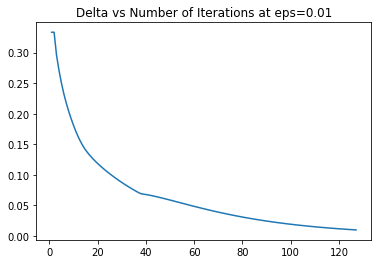

In [21]:
gamma = 0.99
env = gym.make('FrozenLake-v0')
optimalValue, c, r_v = valueIteration(env,gamma, eps=0.01)
print(r_v)
print("epsilon: 0.01")
print("converged at: ", c)
startTime = time.time()
vi_policy = calculatePolicy(optimalValue, gamma)
endTime = time.time()
policy_score = evaluatePolicy(env, vi_policy, gamma, 1000)

print("Best score = %0.2f. Time taken = %4.4f seconds" % (numpy.mean(policy_score), endTime-startTime))
print("time taken: ", endTime-startTime )

plt.plot(*zip(*r_v))
plt.title("Delta vs Number of Iterations at eps=0.01")
plt.show()


[(1, 0.3333333333333333), (2, 0.3333333333333334), (3, 0.29629629629629617), (4, 0.2716049382716049), (5, 0.251028806584362), (6, 0.23319615912208502), (7, 0.21810699588477367), (8, 0.20454199055022082), (9, 0.19250114311842692), (10, 0.18144253077952177), (11, 0.17132663832861983), (12, 0.16209513379660212), (13, 0.1541343880756907), (14, 0.14692024974445772), (15, 0.1408981882731557), (16, 0.13571674832096914), (17, 0.13099157231201586), (18, 0.12663375942411736), (19, 0.12256479118050301), (20, 0.11872880608312641), (21, 0.115085036579333), (22, 0.1116015346720669), (23, 0.10825578745039177), (24, 0.10503028813700421), (25, 0.10191259982801526), (26, 0.09889314937769456)]
epsilon: 0.1
converged at:  26
Best score = 0.51. Time taken = 0.0004 seconds
time taken:  0.00036597251892089844


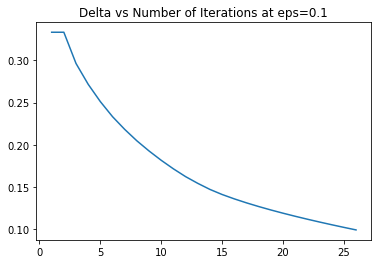

In [18]:
gamma = 0.99
env = gym.make('FrozenLake-v0')
optimalValue, c, r_v = valueIteration(env,gamma, eps=0.1)
print(r_v)
print("epsilon: 0.1")
print("converged at: ", c)
startTime = time.time()
vi_policy = calculatePolicy(optimalValue, gamma)
endTime = time.time()
policy_score = evaluatePolicy(env, vi_policy, gamma, 1000)

print("Best score = %0.2f. Time taken = %4.4f seconds" % (numpy.mean(policy_score), endTime-startTime))
print("time taken: ", endTime-startTime )

plt.plot(*zip(*r_v))
plt.title("Delta vs Number of Iterations at eps=0.1")
plt.show()


In [10]:
print_policy(vi_policy)

array([['←', '↑', '←', '↑', '←', '←', '←', '←'],
       ['↑', '↓', '←', '←', '←', '→', '↓', '←'],
       ['←', '↑', '←', '↑', '←', '←', '←', '←'],
       ['↑', '↓', '←', '←', '←', '→', '↓', '←'],
       ['←', '↑', '←', '↑', '←', '←', '←', '←'],
       ['↑', '↓', '←', '←', '←', '→', '↓', '←'],
       ['←', '↑', '←', '↑', '←', '←', '←', '←'],
       ['↑', '↓', '←', '←', '←', '→', '↓', '←']], dtype='<U1')

In [11]:
#Adapted from https://github.com/danpisq/Value-and-Policy-iteration-OpenAI-FrozenLake/blob/master/policy_iteration.py


#Extract the policy given a value-function
def extractPolicy(v, gamma=1.0):
  policy = numpy.zeros(env.env.nS)
  for s in range(env.env.nS):
    q_sa = numpy.zeros(env.env.nA)
    for a in range(env.env.nA):
      q_sa[a] = sum([p * (r + gamma * v[s_]) for p, s_, r, _ in env.env.P[s][a]])
      policy[s] = numpy.argmax(q_sa)
  return policy
      
#Iteratively calculates value-function under policy   
def CalcPolicyValue(env, policy, gamma=1.0, eps = 0.001):
  value = numpy.zeros(env.env.nS)
  
  while True:
    previousValue = numpy.copy(value)
    for states in range(env.env.nS):
      policy_a = policy[states]
      value[states] = sum([p * (r + gamma * previousValue[s_]) for p,s_, r, _ in env.env.P[states][policy_a]])
    if (numpy.sum((numpy.fabs(previousValue - value))) <= eps):
      break
  return value
  
  
#Policy Iteration algorithm
def policyIteration(env, gamma=1.0, eps = 0.001):
  policy = numpy.random.choice(env.env.nA, size=(env.env.nS))
  maxIterations = 1000
  gamma = 0.99
  r_v = []
  for i in range(maxIterations):
    oldPolicyValue = CalcPolicyValue(env, policy, gamma, eps)
    newPolicy = extractPolicy(oldPolicyValue, gamma)
    r_v.append((i+1, numpy.sum(CalcPolicyValue(env, newPolicy, gamma)) - numpy.sum(oldPolicyValue)))
    if (numpy.all(policy == newPolicy)):
      break
    policy = newPolicy
  return policy, i+1, r_v

converged at:  7
Best score = 0.48. Time taken = 0.1216 seconds
0.48027475812328274


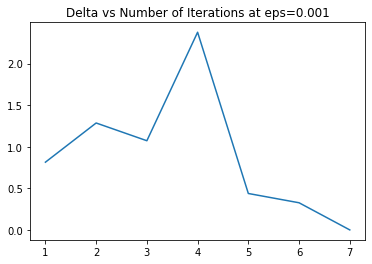

converged at:  7
Best score = 0.49. Time taken = 0.0681 seconds
0.4944947340427853


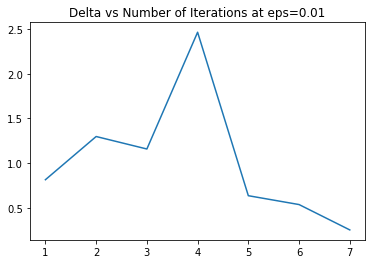

converged at:  3
Best score = 0.47. Time taken = 0.0304 seconds
0.4694818937090782


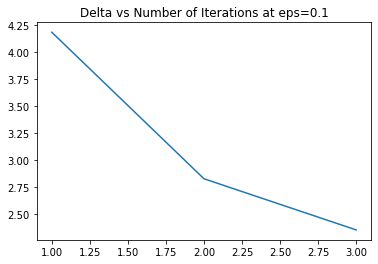

In [29]:
for eps in [0.001, 0.01, 0.1]:
  env = gym.make('FrozenLake-v0')
  ## Policy search
  startTime = time.time()
  pi_policy, c, r_v = policyIteration(env, gamma, eps)
  print("converged at: ", c)
  endTime = time.time()
  scores = evaluatePolicy(env, pi_policy, gamma)

  print("Best score = %0.2f. Time taken = %4.4f seconds" %(numpy.max(scores), endTime-startTime))
  plt.title("Delta vs Number of Iterations at eps="+str(eps))

  print(scores)
  plt.plot(*zip(*r_v))
  plt.show()


In [13]:
print(pi_policy)

[0. 3. 0. 3. 0. 0. 0. 0. 3. 1. 0. 0. 0. 2. 1. 0.]


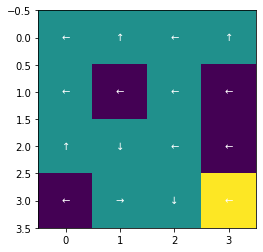

In [14]:
see_policy(4, pi_policy)

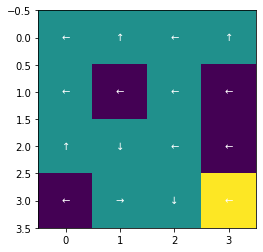

In [15]:
see_policy(4, vi_policy)

In [16]:
print_policy(pi_policy)

array([['←', '↑', '←', '↑', '←', '←', '←', '←'],
       ['↑', '↓', '←', '←', '←', '→', '↓', '←'],
       ['←', '↑', '←', '↑', '←', '←', '←', '←'],
       ['↑', '↓', '←', '←', '←', '→', '↓', '←'],
       ['←', '↑', '←', '↑', '←', '←', '←', '←'],
       ['↑', '↓', '←', '←', '←', '→', '↓', '←'],
       ['←', '↑', '←', '↑', '←', '←', '←', '←'],
       ['↑', '↓', '←', '←', '←', '→', '↓', '←']], dtype='<U1')

In [17]:
pi_policy == vi_policy

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [34]:

from hiive.mdptoolbox.mdp import ValueIteration, PolicyIteration, QLearning
from hiive.mdptoolbox.example import forest

In [51]:
P, R = forest(S=500, r1=100, r2= 15, p=0.01)
results = []
for eps in [0.001, 0.01, 0.1]:
  vi_policy = ValueIteration(P, R, gamma=0.99, epsilon=eps)
  vi_policy.run()
  results.append([eps, vi_policy.time, vi_policy.iter])
pd.DataFrame(results, columns=['Value of epsilon', 'Time to Converge', 'Converge at'])

,Value of epsilon,Time to Converge,Converge at
0,0.001,0.271776,802
1,0.010,0.230738,687
2,0.100,0.201055,573


In [50]:
P, R = forest(S=100, r1=25, r2= 5, p=0.1)
results = []
for eps in [0.001, 0.01, 0.1]:
  vi_policy = ValueIteration(P, R, gamma=0.99, epsilon=eps)
  vi_policy.run()
  results.append([eps, vi_policy.time, vi_policy.iter])
pd.DataFrame(results, columns=['Value of epsilon', 'Time to Converge', 'Converge at'])

,Value of epsilon,Time to Converge,Converge at
0,0.001,0.016491,128
1,0.010,0.012600,108
2,0.100,0.008585,88


In [49]:
P, R = forest(S=500, r1=100, r2= 15, p=0.01)
results = []
for eps in [0.001, 0.01, 0.1]:
  pi_policy = PolicyIteration(P, R, gamma=0.99)
  pi_policy.run()
  results.append([eps, pi_policy.time, pi_policy.iter])
pd.DataFrame(results, columns=['Value of epsilon', 'Time to Converge', 'Converge at'])

,Value of epsilon,Time to Converge,Converge at
0,0.001,3.186224,264
1,0.010,3.159570,264
2,0.100,3.158750,264
